In [22]:
import pandas as pd
import json


DATA DISCOVERING PART

In [23]:
import pandas as pd
import json

with open('email_data.json', encoding='utf-8') as f:
    email_data = json.load(f)

df = pd.json_normalize(email_data, sep='_')

print(df)


                                               subject  \
0       INVITATION/ Studying Master Programs in the UK   
1    [TOMORROW] Explore International Internship Op...   
2                        IE305-A-202301 content change   
3    Explore International Internship Opportunities...   
4                IE311-AB-202301: Exam 2 Announcements   
..                                                 ...   
195   Consulting+ Başvuruları Devam Ediyor! | 3 Ara...   
196                                               Re:    
197                                                Re:   
198                                                      
199     CS201-AB-202202: Lecture ONLY online this week   

                                                  from  \
0           Internship Office <intern@sabanciuniv.edu>   
1           Internship Office <intern@sabanciuniv.edu>   
2    "Sinan Yıldırım (via SUCourse)" <noreply.sucou...   
3           Internship Office <intern@sabanciuniv.edu>   
4    "Ezgi Ka

In [24]:
print(df.head())

                                             subject  \
0     INVITATION/ Studying Master Programs in the UK   
1  [TOMORROW] Explore International Internship Op...   
2                      IE305-A-202301 content change   
3  Explore International Internship Opportunities...   
4              IE311-AB-202301: Exam 2 Announcements   

                                                from  \
0         Internship Office <intern@sabanciuniv.edu>   
1         Internship Office <intern@sabanciuniv.edu>   
2  "Sinan Yıldırım (via SUCourse)" <noreply.sucou...   
3         Internship Office <intern@sabanciuniv.edu>   
4  "Ezgi Karabulut Türkseven (via SUCourse)" <nor...   

                                                  to  \
0                                               None   
1                                               None   
2  "Sahra Nur Kılıç (Student)" <skilic@sabanciuni...   
3                                               None   
4  "Sahra Nur Kılıç (Student)" <skilic@sabanci

In [25]:
#opps we are not interested in content type lest fix this

df['decoded_content'] = df['content'].apply(lambda x: x[0]['decoded_content'] if x and isinstance(x, list) and 'decoded_content' in x[0] else None)

df = df.drop('content', axis=1)

print(df)


                                               subject  \
0       INVITATION/ Studying Master Programs in the UK   
1    [TOMORROW] Explore International Internship Op...   
2                        IE305-A-202301 content change   
3    Explore International Internship Opportunities...   
4                IE311-AB-202301: Exam 2 Announcements   
..                                                 ...   
195   Consulting+ Başvuruları Devam Ediyor! | 3 Ara...   
196                                               Re:    
197                                                Re:   
198                                                      
199     CS201-AB-202202: Lecture ONLY online this week   

                                                  from  \
0           Internship Office <intern@sabanciuniv.edu>   
1           Internship Office <intern@sabanciuniv.edu>   
2    "Sinan Yıldırım (via SUCourse)" <noreply.sucou...   
3           Internship Office <intern@sabanciuniv.edu>   
4    "Ezgi Ka

In [26]:
#lets Display basic information about the DataFrame 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   subject          200 non-null    object
 1   from             200 non-null    object
 2   to               183 non-null    object
 3   date             200 non-null    object
 4   decoded_content  160 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB
None


In [27]:
#there are some null values that can cause problem
df.fillna('', inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   subject          200 non-null    object
 1   from             200 non-null    object
 2   to               200 non-null    object
 3   date             200 non-null    object
 4   decoded_content  200 non-null    object
dtypes: object(5)
memory usage: 7.9+ KB
None


In [28]:
#nice lets discover our dataframe
print(df.describe())

       subject                                               from  \
count      200                                                200   
unique     157                                                 69   
top             "Sahra Nur Kılıç (Student)" <skilic@sabanciuni...   
freq        15                                                 29   

                                                       to  \
count                                                 200   
unique                                                 34   
top     "Sahra Nur Kılıç (Student)" <skilic@sabanciuni...   
freq                                                   60   

                                   date decoded_content  
count                               200             200  
unique                              200             154  
top     Wed, 06 Dec 2023 14:28:10 +0300                  
freq                                  1              40  


In [29]:
#hmm can we know who has sent the most emails to me?
sender_counts = df['from'].value_counts()

most_frequent_sender = sender_counts.idxmax()
count_most_frequent_sender = sender_counts.max()

print(f"The sender who sent the most emails is: {most_frequent_sender}")
print(f"Count of emails from the most frequent sender: {count_most_frequent_sender}")


The sender who sent the most emails is: "Sahra Nur Kılıç (Student)" <skilic@sabanciuniv.edu>
Count of emails from the most frequent sender: 29


In [30]:
#I am a student so there should be some exam key word right?
from collections import Counter
import re

all_decoded_content = ' '.join(df['decoded_content'].dropna())

words = re.findall(r'\b\w+\b', all_decoded_content.lower())

exam_count = Counter(words)['exam']

print(f"The word 'exam' appears {exam_count} times.")


The word 'exam' appears 53 times.


since I am a student... meaningful

DATA ANALYZING AND GRAPHS

In [31]:
df['date'] = pd.to_datetime(df['date'], format='%a, %d %b %Y %H:%M:%S %z')

In [32]:
import matplotlib.pyplot as plt

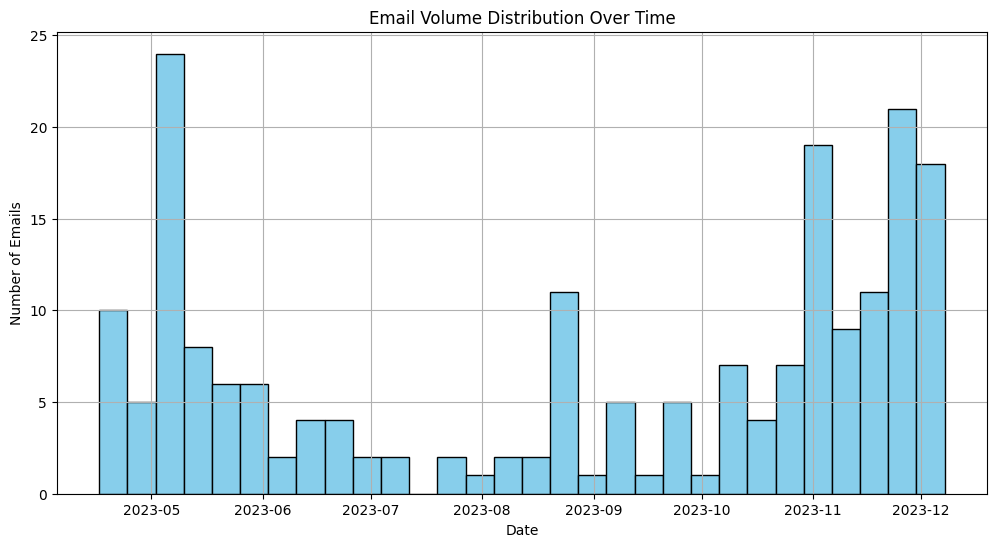

In [33]:
plt.figure(figsize=(12, 6))
df['date'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Email Volume Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.show()



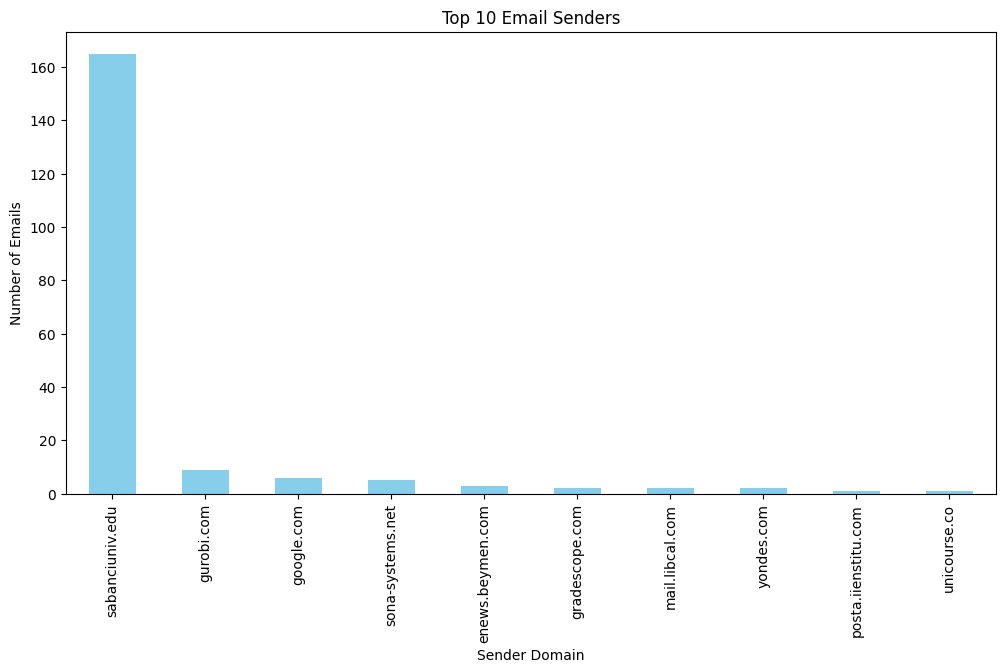

In [34]:
df['sender_domain'] = df['from'].str.extract(r'@([^>]+)')

sender_counts = df['sender_domain'].value_counts()

plt.figure(figsize=(12, 6))
sender_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Email Senders')
plt.xlabel('Sender Domain')
plt.ylabel('Number of Emails')
plt.show()


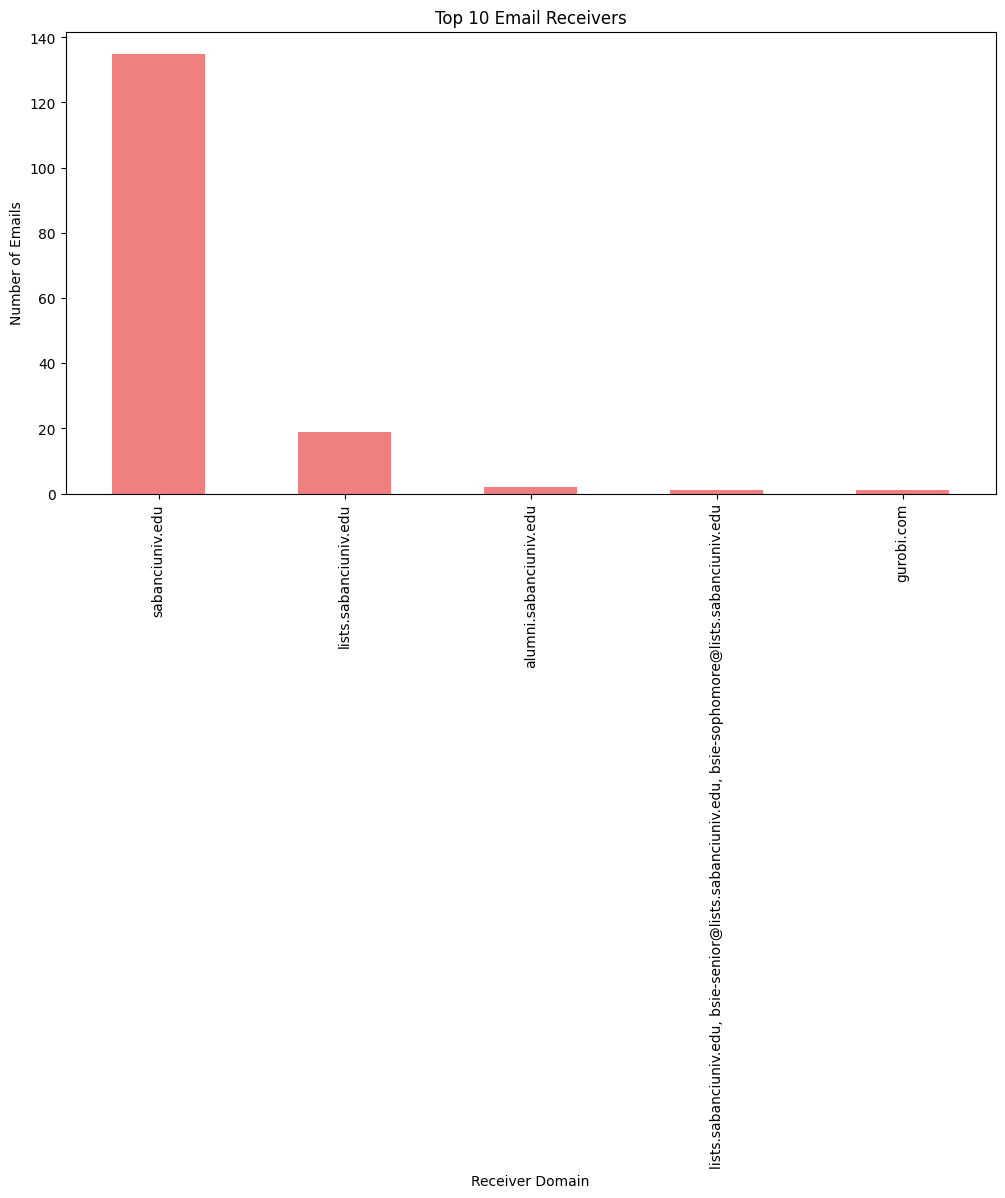

In [35]:
import matplotlib.pyplot as plt

df['receiver_domain'] = df['to'].str.extract(r'@([^>]+)')

receiver_counts = df['receiver_domain'].value_counts()

plt.figure(figsize=(12, 6))
receiver_counts.head(10).plot(kind='bar', color='lightcoral')
plt.title('Top 10 Email Receivers')
plt.xlabel('Receiver Domain')
plt.ylabel('Number of Emails')
plt.show()


In [36]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MFX-4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MFX-4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

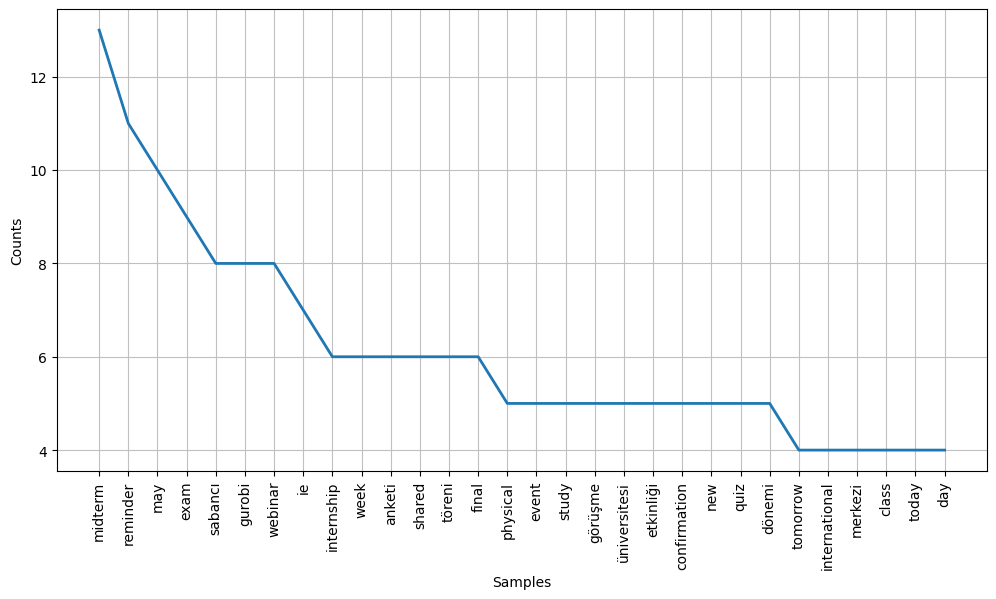

<Axes: xlabel='Samples', ylabel='Counts'>

In [37]:
all_subjects = ' '.join(df['subject'].dropna())

words = word_tokenize(all_subjects)

stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

freq_dist = FreqDist(filtered_words)

plt.figure(figsize=(12, 6))
freq_dist.plot(30, cumulative=False)


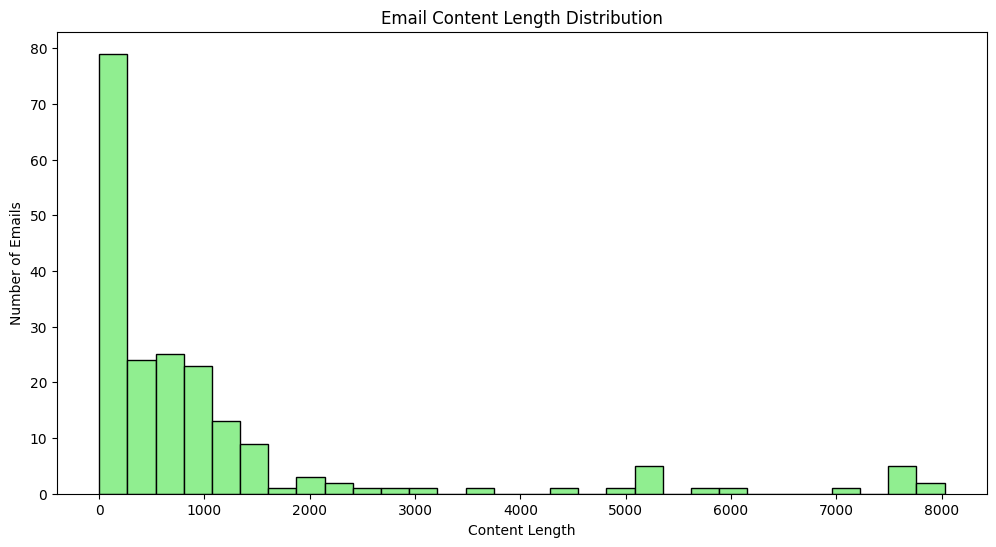

In [38]:

df_filtered = df.dropna(subset=['decoded_content'])

df_filtered['content_length'] = df_filtered['decoded_content'].apply(len)

plt.figure(figsize=(12, 6))
plt.hist(df_filtered['content_length'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Email Content Length Distribution')
plt.xlabel('Content Length')
plt.ylabel('Number of Emails')
plt.show()


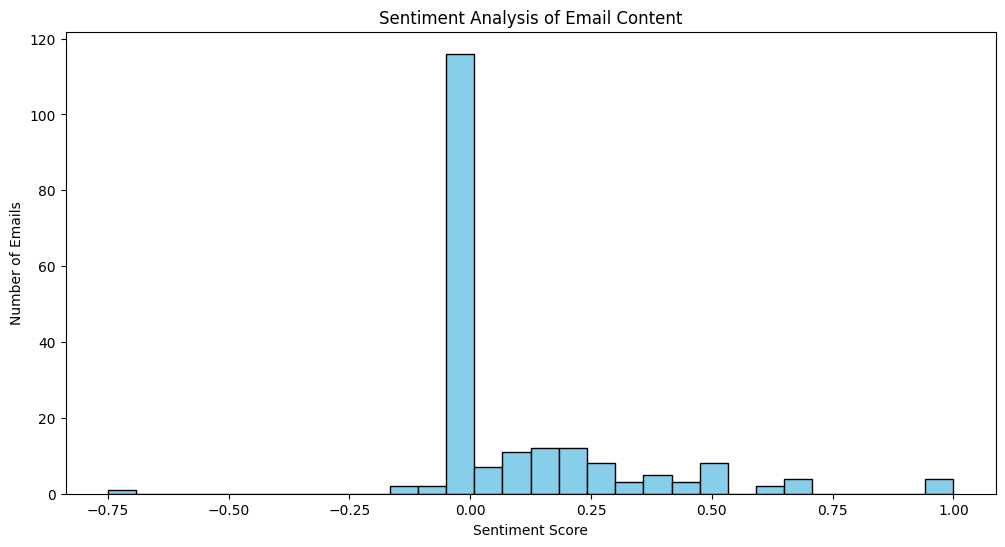

In [39]:
from textblob import TextBlob

df_filtered = df.dropna(subset=['decoded_content'])

df_filtered['sentiment'] = df_filtered['decoded_content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(12, 6))
plt.hist(df_filtered['sentiment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sentiment Analysis of Email Content')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Emails')
plt.show()


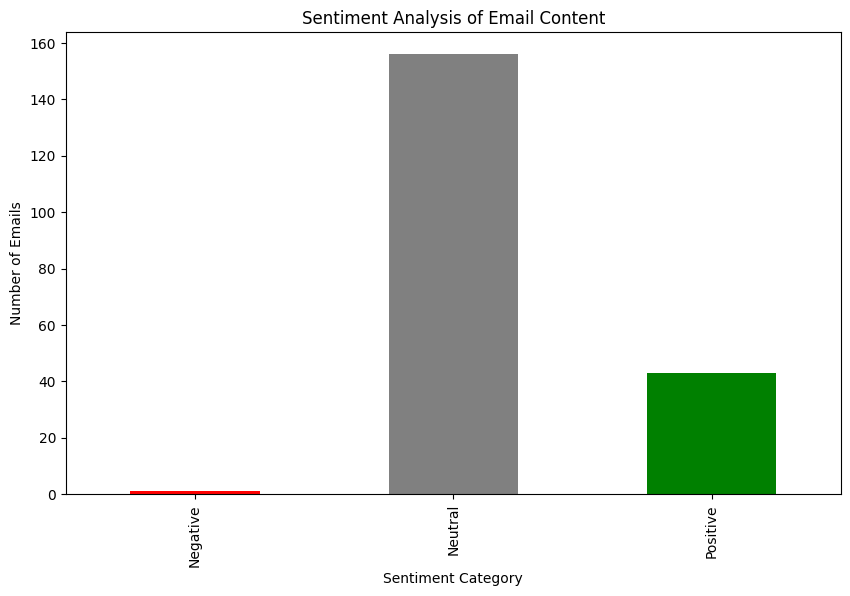

In [40]:
import numpy as np

negative_range = (-1, -0.2)
neutral_range = (-0.2, 0.2)
positive_range = (0.2, 1)

df_filtered['sentiment_category'] = np.select(
    [
        (df_filtered['sentiment'] >= negative_range[0]) & (df_filtered['sentiment'] < negative_range[1]),
        (df_filtered['sentiment'] >= neutral_range[0]) & (df_filtered['sentiment'] < neutral_range[1]),
        (df_filtered['sentiment'] >= positive_range[0]) & (df_filtered['sentiment'] <= positive_range[1])
    ],
    ['Negative', 'Neutral', 'Positive'],
    default='Unknown'
)

plt.figure(figsize=(10, 6))
df_filtered['sentiment_category'].value_counts().sort_index().plot(kind='bar', color=['red', 'grey', 'green'])
plt.title('Sentiment Analysis of Email Content')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Emails')
plt.show()


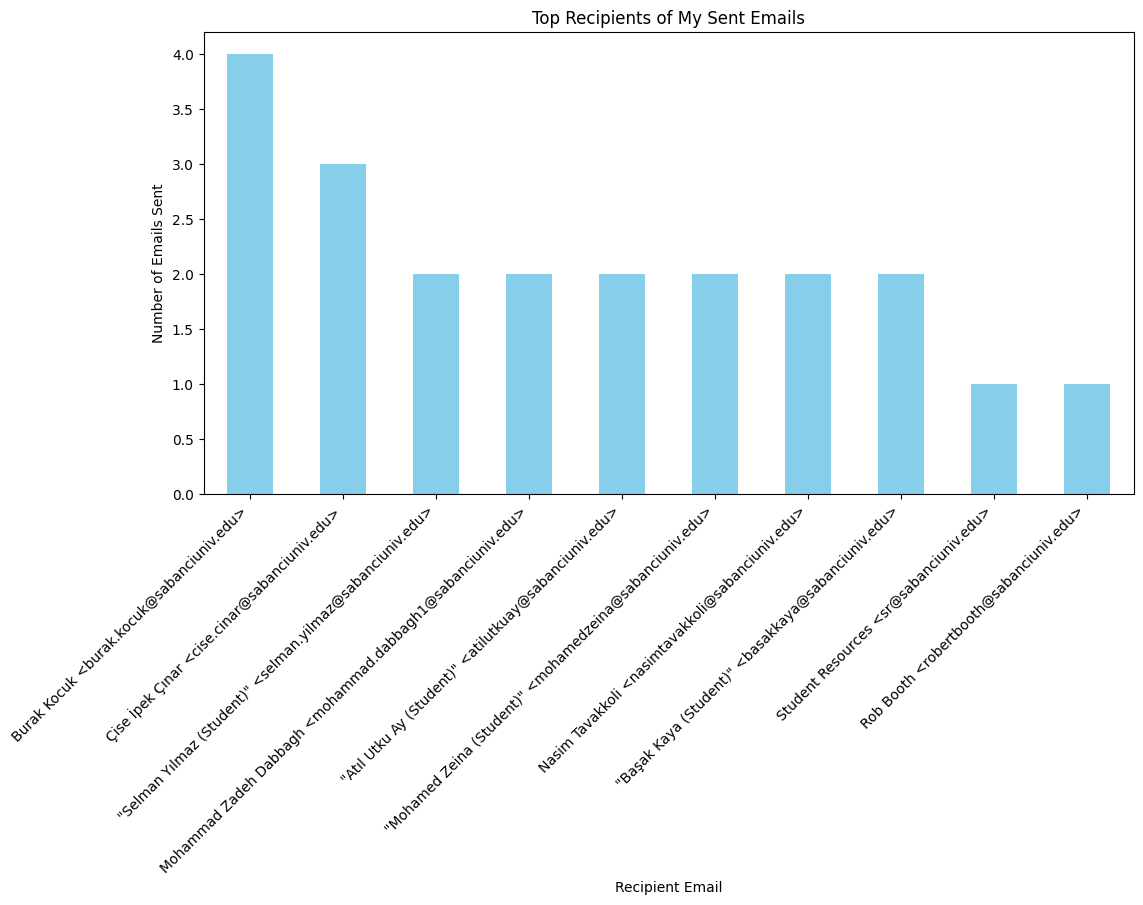

In [41]:
your_email = 'skilic@sabanciuniv.edu'

df['from_email'] = df['from'].str.extract(r'<(.*?)>')

sent_emails_df = df[df['from_email'].str.contains(your_email, case=False, na=False)]

top_recipients = sent_emails_df['to'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_recipients.plot(kind='bar', color='skyblue')
plt.title('Top Recipients of My Sent Emails')
plt.xlabel('Recipient Email')
plt.ylabel('Number of Emails Sent')
plt.xticks(rotation=45, ha='right')
plt.show()


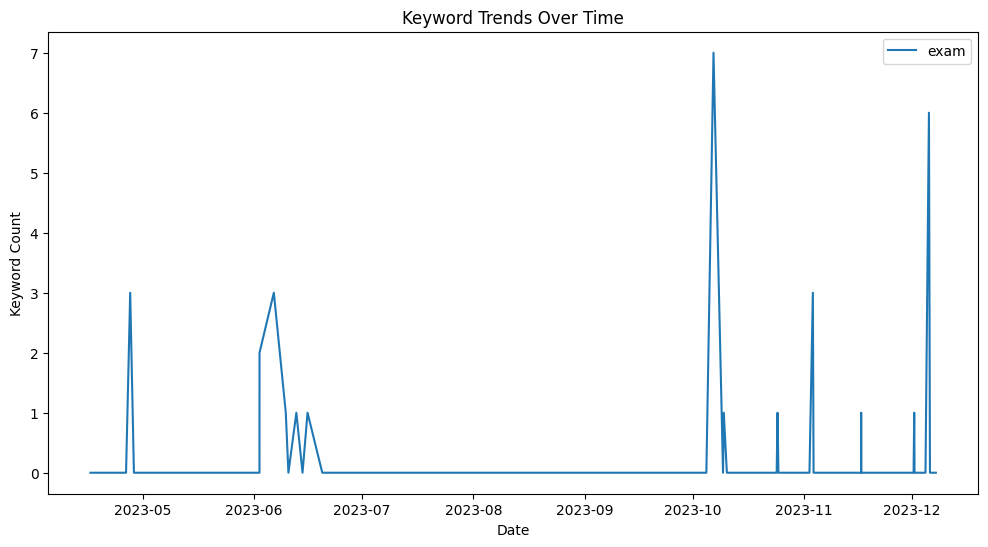

In [42]:
df['tokenized_content'] = df['decoded_content'].apply(word_tokenize)

keywords_to_track = ['exam']

keywords_to_track_lower = [keyword.lower() for keyword in keywords_to_track]

for keyword in keywords_to_track_lower:
    df[keyword] = 0

for keyword in keywords_to_track_lower:
    df[keyword] = df['tokenized_content'].apply(lambda x: x.count(keyword))

keyword_trends = df.groupby('date')[keywords_to_track_lower].sum()

plt.figure(figsize=(12, 6))

for keyword in keywords_to_track_lower:
    plt.plot(keyword_trends.index, keyword_trends[keyword], label=keyword)

plt.title('Keyword Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Keyword Count')
plt.legend()
plt.show()